In [40]:
import numpy as np
import pandas as pd
import random
import json

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import *
from sklearn.naive_bayes import *
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
from sklearn import tree
from sklearn import svm

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None, 
                          cmap=plt.cm.Blues):
  if not title:
    if normalize:
      title = 'Normalized confusion matrix'
    else:
      title = 'Confusion matrix, no normalization'
  cm = confusion_matrix(y_true, y_pred)
  #classes = classes[unique_labels(y_true, y_pred)]
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    
  else:
    pass
    
  
  fig, ax = plt.subplots()
  im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
  ax.figure.colorbar(im, ax=ax)

  ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]), xticklabels=classes, yticklabels=classes, title=title, ylabel='true label', xlabel='predicted label')
  

  ax.set_ylim(len(classes)-0.5, -0.5)

  

  fmt= '.2f' if normalize else 'd'
  thresh=cm.max() / 2.
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      ax.text(j, i, format(cm[i, j], fmt), ha="center", va="center", color="white" if cm[i, j]>thresh else "black")
  fig.tight_layout()
  return ax


print('Libraries imported.')

Libraries imported.


In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
%ls

drive/  sample_data/


###**Preprocessing**

In [43]:
filename = '/content/drive/MyDrive/Colab Notebooks/ML_homework_1/noduplicatedataset.json' #dataset.json'
db=pd.read_json(filename, lines=True)

print('File loaded: %d samples.' %(len(db)))


lista={}

k=0
for i in db.index:
  
  lista[k] = db.lista_asm[k].split("', '")
  n=0
  
  l=len(lista[k])
  for j in range(l):
    lista[k][n]= lista[k][n].split() #divido ogni istruzione rispetto agli spazi
    n += 1
  k += 1


sample =''
dataset=[]
for i in range(len(lista)):  #ogni sample del dataset
  for j in range(len(lista[i])):  #ogni istruzione in un singolo sample
    if j==0:
      sample = sample+" "+lista[i][j][0][2:]
    else:
      sample = sample+" "+lista[i][j][0]

  dataset.append(sample)
  sample=''  



File loaded: 6073 samples.


###**Vectorization**

In [44]:

vectorizer_type = "count" 

vectorizer = CountVectorizer(stop_words='english') # multinomial

X_all = vectorizer.fit_transform(dataset)
y_all = db.semantic

nameClasses=[]
for c in db.semantic:
  if c not in nameClasses:
    nameClasses.append(c)

math = 0
string = 0
sort = 0
encr = 0
for c in db.semantic:
  if c=='math':
    math += 1;
  elif c=='string':
    string += 1;
  elif c=='sort':
    sort += 1;
  else:
    encr += 1;
class_names = np.array([str(c) for c in nameClasses])
class_names.sort()

print(X_all.shape)
print(y_all.shape)
print(class_names)
print('number samples for encryption: ', encr)
print('number samples for math: ', math)
print('number samples for string manipulation: ', string)
print('number samples for sort: ', sort)

(6073, 177)
(6073,)
['encryption' 'math' 'sort' 'string']
number samples for encryption:  1110
number samples for math:  2412
number samples for string manipulation:  2014
number samples for sort:  537


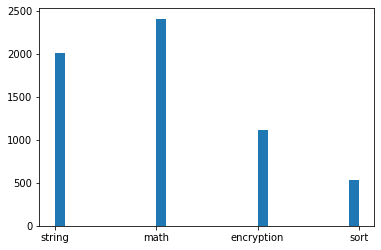

In [45]:
%matplotlib inline
plt.hist(y_all, 30)
plt.show()

###**Split in training set and test set**

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
          test_size=0.2, random_state=15)

id = random.randrange(0,X_train.shape[0])
print('%d ' %(id))

print("Train: %d - Test: %d" %(X_train.shape[0],X_test.shape[0]))
#print('%d %s %s' %(id,str(y_train[id]),str(X_train[id])))

992 
Train: 4858 - Test: 1215


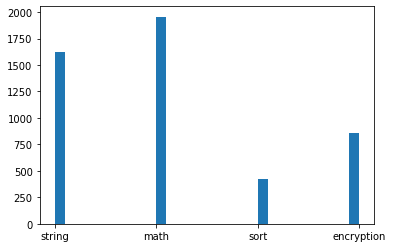

In [47]:
%matplotlib inline
plt.hist(y_train, 30)
plt.show()

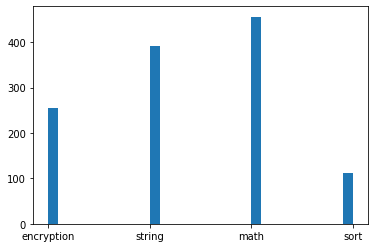

In [48]:
%matplotlib inline
plt.hist(y_test, 30)
plt.show()

###**Models**

In [49]:
model_type = "svm" # "svm"" or "decisionTree"
kernel_name = 'linear' #linear, poly, rbf, sigmoid

if model_type == "decisionTree":
  model = tree.DecisionTreeClassifier()
  print('Decision Tree Model created')
elif model_type == "svm":
  model = svm.SVC(C=1, kernel= kernel_name, degree=7, gamma='scale')
  print('SVM Model created')

SVM Model created


### ***Fit the model***

In [50]:
model.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=7, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

###**Prediction on test set and Accuracy**

In [51]:
y_pred = model.predict(X_test)

acc = model.score(X_test, y_test)
print("Accuracy = %.3f" %acc)

Accuracy = 0.983


###**Precision and Recall**

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  encryption       0.98      0.99      0.98       256
        math       0.98      0.99      0.99       456
        sort       0.97      0.89      0.93       112
      string       0.98      0.99      0.99       391

    accuracy                           0.98      1215
   macro avg       0.98      0.97      0.97      1215
weighted avg       0.98      0.98      0.98      1215



###**Confusion Matrix**

[[253   2   1   0]
 [  1 453   1   1]
 [  4   3 100   5]
 [  0   2   1 388]]


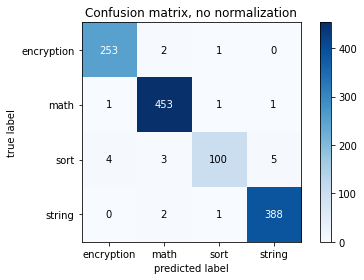

In [53]:
#CONFUSION MATRIX
cm= confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
print(cm)
plot_confusion_matrix(y_test, y_pred, class_names, normalize=False)

###**Preprocessing blind set**

In [54]:
filename1 = '/content/drive/MyDrive/Colab Notebooks/ML_homework_1/nodupblindtest.json' #dataset.json'
db1=pd.read_json(filename1, lines=True)

print('Blind file loaded: %d samples.' %(len(db1)))


lista={}

k=0
for i in db1.index:
  
  lista[k] = db1.lista_asm[k].split("', '")
  n=0
  
  l=len(lista[k])
  for j in range(l):
    lista[k][n]= lista[k][n].split() #divido ogni istruzione rispetto agli spazi
    n += 1
  k += 1


sample =''
dataset=[]
for i in range(len(lista)):  #ogni sample del dataset
  for j in range(len(lista[i])):  #ogni istruzione in un singolo sample
    if j==0:
      sample = sample+" "+lista[i][j][0][2:]
    else:
      sample = sample+" "+lista[i][j][0]

  dataset.append(sample)
  sample=''  



Blind file loaded: 621 samples.


###**vectorization**

In [55]:
X_blind = vectorizer.transform(dataset)

print(X_blind.shape)


(621, 177)


###**prediction on blind set**

In [64]:
y_pred_blind = model.predict(X_blind)

#print(y_pred_blind)

file = open("/content/drive/MyDrive/Colab Notebooks/ML_homework_1/1813509.txt", "w")
for c in y_pred_blind:
  file.write(c)
  file.write("\n")

file.close()

print(y_pred_blind)


['encryption' 'math' 'string' 'string' 'math' 'string' 'encryption'
 'encryption' 'sort' 'math' 'math' 'math' 'sort' 'encryption' 'math'
 'math' 'string' 'string' 'math' 'math' 'math' 'string' 'encryption'
 'math' 'encryption' 'string' 'string' 'math' 'math' 'sort' 'sort' 'sort'
 'sort' 'sort' 'string' 'sort' 'string' 'math' 'sort' 'string' 'string'
 'math' 'sort' 'math' 'sort' 'sort' 'sort' 'string' 'string' 'sort' 'sort'
 'math' 'math' 'string' 'string' 'math' 'math' 'math' 'math' 'encryption'
 'sort' 'math' 'string' 'string' 'sort' 'string' 'sort' 'encryption'
 'encryption' 'string' 'string' 'math' 'sort' 'sort' 'sort' 'sort' 'sort'
 'encryption' 'math' 'sort' 'string' 'math' 'string' 'math' 'encryption'
 'math' 'string' 'string' 'string' 'encryption' 'sort' 'string' 'math'
 'encryption' 'encryption' 'encryption' 'math' 'sort' 'encryption' 'math'
 'math' 'math' 'math' 'math' 'encryption' 'string' 'sort' 'string'
 'string' 'encryption' 'math' 'sort' 'sort' 'string' 'encryption' 'math